In [ ]:
!pip install deeplake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.0/437.0 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.9 MB/s eta 0:00:00
  Created wheel for deeplake: filename=deeplake-3.2.8-py3-none-any.whl size=532127 sha256=b913ab1f8c408ede36714ab1bc73eca44627c4fda435a

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
import deeplake
ds = deeplake.load('hub://activeloop/flickr30k')

hub://activeloop/flickr30k loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/flickr30k


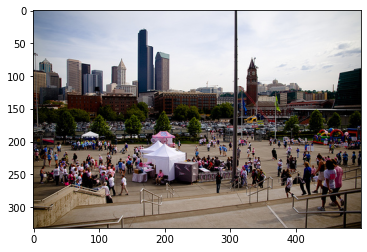

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(ds.image[0])

In [ ]:
len(ds.image)

31783

In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
# from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add# load vgg19 model\
from tensorflow.keras.backend import get_value


In [ ]:
from keras.models import Model
from keras.applications import ResNet50
import tensorflow as tf

incept_model = ResNet50(include_top=True)
output_from_lastbut1_layer = incept_model.layers[-2].output
model_resnet50 = Model(inputs = incept_model.input,outputs = output_from_lastbut1_layer)

102967424/102967424 [==============================] - 5s 0us/step


In [ ]:
model_resnet50.save('/content/drive/MyDrive/model_resnet50_ver3.h5')

In [ ]:
print(model_resnet50.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

ValueError: ignored

In [ ]:
# from keras.models import load_model
# cnn_lstm_model = load_model('/content/drive/MyDrive/cnn_lstm_model_30k_ver3.h5')
# resnet_model = load_model('/content/drive/MyDrive//model_resnet50_ver3.h5')

In [ ]:
with open('/content/drive/MyDrive/tokenizer_ver3.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
max_length = 74

In [ ]:
import tensorflow as tf
features = {}
for num in range(len(ds.image)):
    img = ds.image[num].numpy()
    img = tf.image.resize(img, [224,224])
    img = img.numpy().reshape(1,224,224,3)
    img= tf.keras.applications.resnet50.preprocess_input(img, data_format=None)
    features_from_resnet = model_resnet50.predict(img).reshape(2048,)
    features[num] = features_from_resnet

print(f'Total number of images and features: {len(features)}')

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# New Section

In [ ]:
import torch
torch.save(features, './features_30k_images.t7')

NameError: ignored

In [ ]:
import torch
features = torch.load('/content/drive/MyDrive/features_30k_images.t7')
len(features)

31783

In [ ]:
import os
captions_dict = {}

for i in range(len(ds.image)):
  
    try:
        img_name = i

        caption_0 = ds.caption_0[i].data()["value"]
        caption_1 = ds.caption_1[i].data()["value"]
        caption_2 = ds.caption_2[i].data()["value"]
        caption_3 = ds.caption_3[i].data()["value"]
        caption_4 = ds.caption_4[i].data()["value"]

        caption = []
        caption.append(caption_0)
        caption.append(caption_1)
        caption.append(caption_2)
        caption.append(caption_3)
        caption.append(caption_4)

        captions_dict[img_name] = caption
            
    except:
        pass
        
print(len(captions_dict))
#print(captions_dict{'940973925_a2e6d7951c.jpg'})

/usr/local/lib/python3.8/dist-packages/deeplake/core/tensor.py:600: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


31783


In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [ ]:
clean(captions_dict)

In [ ]:
all_captions = []
for key in captions_dict:
    for caption in captions_dict[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

158915

In [ ]:
all_captions[1:10]

['startseq groups of people are in urban park or walking towards the main area endseq',
 'startseq people enjoying themselves outdoors maybe fair is going on endseq',
 'startseq people are gathering for some event in the city endseq',
 'startseq busy promenade where people gather endseq',
 'startseq two women in light blue and dark blue jacket walking in crosswalk and fake giant rat is on the sidewalk behind them endseq',
 'startseq two women crossing the street with giant rat in the background endseq',
 'startseq two ladies are crossing street right in front of restaurant endseq',
 'startseq two middle-aged women crossing city street endseq',
 'startseq two women walking down crosswalk endseq']

In [ ]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
import pickle

# saving
with open('/content/drive/MyDrive/tokenizer_ver3.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle

# saving
with open('/content/drive/MyDrive/tokenizer_new.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# loading
with open('/content/drive/MyDrive/tokenizer_new.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
vocab_size

18313

In [ ]:
tokenizer.word_index

{'startseq': 1,
 'endseq': 2,
 'in': 3,
 'the': 4,
 'on': 5,
 'and': 6,
 'man': 7,
 'is': 8,
 'of': 9,
 'with': 10,
 'woman': 11,
 'two': 12,
 'are': 13,
 'to': 14,
 'people': 15,
 'at': 16,
 'an': 17,
 'wearing': 18,
 'shirt': 19,
 'white': 20,
 'young': 21,
 'black': 22,
 'while': 23,
 'his': 24,
 'blue': 25,
 'red': 26,
 'girl': 27,
 'sitting': 28,
 'men': 29,
 'boy': 30,
 'standing': 31,
 'dog': 32,
 'playing': 33,
 'street': 34,
 'group': 35,
 'down': 36,
 'front': 37,
 'her': 38,
 'walking': 39,
 'holding': 40,
 'one': 41,
 'water': 42,
 'three': 43,
 'by': 44,
 'women': 45,
 'green': 46,
 'up': 47,
 'looking': 48,
 'child': 49,
 'as': 50,
 'for': 51,
 'little': 52,
 'large': 53,
 'outside': 54,
 'brown': 55,
 'yellow': 56,
 'person': 57,
 'children': 58,
 'through': 59,
 'hat': 60,
 'from': 61,
 'their': 62,
 'other': 63,
 'ball': 64,
 'small': 65,
 'next': 66,
 'into': 67,
 'over': 68,
 'some': 69,
 'dressed': 70,
 'out': 71,
 'another': 72,
 'running': 73,
 'building': 74,
 'j

In [ ]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

74

In [ ]:
image_ids = list(captions_dict.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i] 
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0
   #generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size):

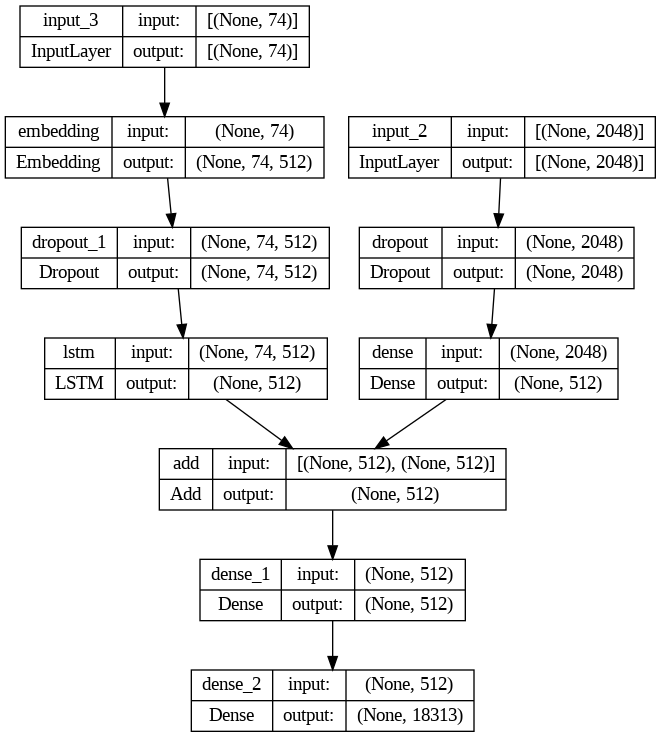

In [ ]:
# encoder model
# image feature layers
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(512, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 512, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(512)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(512, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [ ]:
# train the model
epochs = 10
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, captions_dict, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

893/893 [==============================] - 588s 658ms/step - loss: 2.5801


In [ ]:
model.save('/content/drive/MyDrive/cnn_lstm_model_30k_ver3.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/cnn_lstm_model_30k_ver3.h5')

In [ ]:
# model = cnn_lstm_model

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
import tensorflow as tf

# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    image = image.reshape(1,-1)
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = captions_dict[key]
    # predict the caption for image
    y_pred = predict_caption(model, np.array(features[key]), tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/3179 [00:00<?, ?it/s]

BLEU-1: 0.562477
BLEU-2: 0.328097


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    # image = Image.open(img_path)
    captions = captions_dict[image_name]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_name], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(ds.image[image_name])

---------------------Actual---------------------
startseq crowds of people are walking are multicolored tents and flags that are put up outside in cement lot as big city looms in the distance endseq
startseq groups of people are in urban park or walking towards the main area endseq
startseq people enjoying themselves outdoors maybe fair is going on endseq
startseq people are gathering for some event in the city endseq
startseq busy promenade where people gather endseq
--------------------Predicted--------------------
startseq people are walking on the street endseq


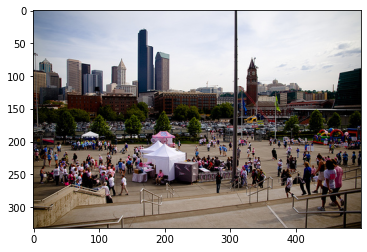

In [ ]:
generate_caption(0)

---------------------Actual---------------------
startseq two women in light blue and dark blue jacket walking in crosswalk and fake giant rat is on the sidewalk behind them endseq
startseq two women crossing the street with giant rat in the background endseq
startseq two ladies are crossing street right in front of restaurant endseq
startseq two middle-aged women crossing city street endseq
startseq two women walking down crosswalk endseq
--------------------Predicted--------------------
startseq man in white shirt and jeans is walking down the street endseq


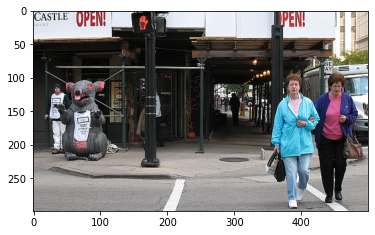

In [ ]:
generate_caption(1)

---------------------Actual---------------------
startseq security officer with tiny face and big glasses leans on metal gate looking into the camera endseq
startseq outside building uniformed security guard looks at the camera from behind fence endseq
startseq customs officer leaning on bike rack outside of an office building endseq
startseq an officer squints directly at the camera as he leans on metal bar endseq
startseq park ranger looking very stern today endseq
--------------------Predicted--------------------
startseq man in straw hat and hat is standing next to fence endseq


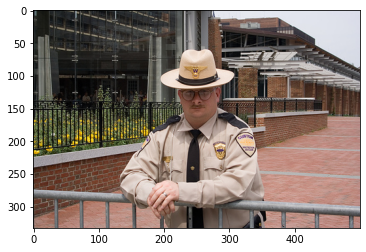

In [ ]:
generate_caption(2)

---------------------Actual---------------------
startseq man enjoys peaceful solitary moment while camping endseq
startseq man with backpack takes rest in the tall grass endseq
startseq man sits on field near backpack endseq
startseq man relaxes with his backpack endseq
startseq hiker resting in field endseq
--------------------Predicted--------------------
startseq man in white shirt and khaki pants is walking through field of grass endseq


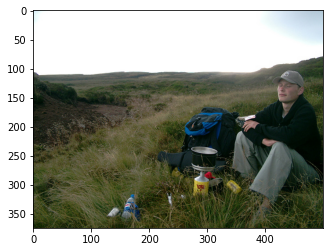

In [ ]:
generate_caption(4)

---------------------Actual---------------------
startseq young indian male is hitting red ball with bat next to brown chair endseq
startseq little boy playing some game and trying to hit the ball with paddle endseq
startseq young boy about to hit ball with baseball bat endseq
startseq this boy is playing stickball endseq
startseq boy is playing cricket endseq
--------------------Predicted--------------------
startseq man in white shirt and jeans is walking down the street endseq


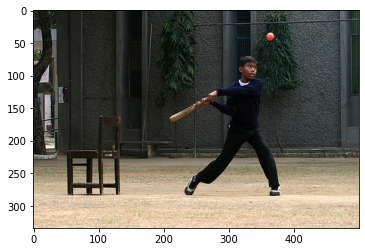

In [ ]:
generate_caption(5)